---

>⚠️ DISCLAIMER - This entire notebook was written by 🧠ChatGPT 4o. The syntax proposed is not canonical but suggested by ChatGPT and its functional.<br>
> The code can be run in any notebook of **SFPPylite** after proper initialization: 

---

In [15]:
# 📝 Notebook configuration
nbCONF = {"📌": "🌐SFPPyLite - ╰┈➤GPT Prompt🗣️🗨", "🎨": "svg", "⚠️": False, "🚨": False} # | 📌:title |🎨:renderer=svg/png/retina |⚠️: disclaimer=True/False | 🚨: alert=True/False

# ⛔ SFPPyLite configurator (the =3= lines with nbCong definition above should be included at the beginning of any SFPPyLite Notebook ‼️)
print("🚀 SFPPyLite🌐 initializing in your browser...","📦 Installing required packages (may take up to ⏳10 seconds)...",sep="\n"); import micropip, sys, os, time, builtins; start = time.time(); "/drive" in sys.path or sys.path.append("/drive"); await micropip.install(["numpy", "scipy", "matplotlib", "pandas", "ipywidgets", "nbformat", "openpyxl"])
print("🧱 Assembling notebook elements..."); from IPython.display import display, HTML; from utils.nbutils import set_figure_format, create_header_footer, create_logo, create_subtitle, create_synopsis, create_disclaimer, create_alert; set_figure_format(nbCONF.get("🎨")); logo, subtitle, synopsis, disclaimer, alert, = create_logo(), create_subtitle(), create_synopsis(), create_disclaimer(), create_alert(fontsize=14)
(header,footer,separator) = create_header_footer(title=nbCONF.get("📌"),what="all"); separator2 = HTML('<hr style="border: none; height: 4px; width: 60%; margin: 2em auto; background-color: #4CAF50; border-radius: 2px;">'); print(f"✅ SFPPyLite🌐 initialized in {time.time()-start:.2f} seconds."); what = [header] + ([subtitle, disclaimer] if nbCONF.get("⚠️") else []) + ([alert] if nbCONF.get("🚨") else []) + [separator]; display(*what)


🚀 SFPPyLite🌐 initializing in your browser...
📦 Installing required packages (may take up to ⏳10 seconds)...
🧱 Assembling notebook elements...
📊 Matplotlib inline figure format set to: svg
✅ SFPPyLite🌐 initialized in 0.75 seconds.


# 🧪 SFPPy Natural Language Interface Notebook

This notebook demonstrates how to **instruct an AI assistant** (like ChatGPT) to generate simulation code using the [SFPPy](https://github.com/ovitrac/sfppy) or [SFPPylite](https://github.com/ovitrac/sfppylite) framework.

You can describe your material setup and regulatory question **in natural language**, and the assistant will generate Python code that simulates migration and evaluates compliance based on **Regulation (EU) 10/2011**.


### 📦 Valid Polymer Names (AI-readable table)

| PolymerName       | Meaning                          |
|-------------------|----------------------------------|
| LDPE              | Low-density polyethylene         |
| HDPE              | High-density polyethylene        |
| PP                | Polypropylene                    |
| oPP               | Oriented polypropylene           |
| PS                | Polystyrene                      |
| HIPS              | High-impact polystyrene          |
| PVC               | Polyvinyl chloride               |
| rigidPVC          | Rigid PVC                        |
| plasticizedPVC    | Plasticized PVC                  |
| PA6               | Polyamide 6                      |
| PA66              | Polyamide 66                     |
| PBT               | Polybutylene terephthalate       |
| PEN               | Polyethylene naphthalate         |
| PVAc              | Polyvinyl acetate                |
| PMMA              | Polymethyl methacrylate          |
| gPET              | Dry glassy PET                   |
| wPET              | Wet/plasticized PET              |
| rPET              | PET above Tg (rubbery state)     |
| rPS               | Rubber-state PS (T > Tg)         |
| rHIPS             | Rubber-state HIPS (T > Tg)       |



### 🧪 Valid Simulant Names (AI-readable table)

| SimulantName        | Official Simulant                  |
|---------------------|------------------------------------|
| water               | Water                              |
| ethanol             | Ethanol                            |
| ethanol50           | 50% Ethanol (v/v)                  |
| oliveoil            | Olive oil                          |
| water3aceticacid    | 3% Acetic acid (w/v)               |



### ⚠️ Substance Naming Rules

- Substances must be provided as:
  - **Exact IUPAC name**
  - **Recognized commercial name**
  - Or a **valid CAS number**
- **No fuzzy matching** or guesswork is performed.
- Examples of valid entries:
  - `"BHT"`, `"Butylated hydroxytoluene"`, `"128-37-0"` ✅
  - `"butylated hydroxy toluene"` ❌ (will likely fail)
  - `"BHT antioxidant"` ❌


## 💡 What you can do

You can ask:

> Simulate a 100 µm thick LDPE film containing 500 a.u. of Irganox 1010, in contact with ethanol 50% at 70°C for 2 hours over 1 dm² and 100 mL of food simulant. Is it compliant?

The assistant will generate code like this:

In [ ]:
V = (0.1, 'L')
A = (1, 'dm**2')
t = (2, 'hours')
T = (70, 'degC')
Fname = 'ethanol50'
Pname = 'LDPE'
l = (100, 'µm')
C0 = 500
m = 'Irganox 1010'

simulant = getattr(patankar.food, Fname)(volume=V, surfacearea=A, contacttime=t, contacttemperature=T)
polymer = getattr(patankar.layer, Pname)(substance=m, l=l, C0=C0)
sim = simulant >> polymer >> simulant

CF = sim.CFtarget
SML = sim.restart.inputs["multilayer"].substance.SML
compliant = CF < SML
compliant

## 📋 Prompt Template

Use this pattern in your message to ChatGPT or compatible assistant:

```
Simulate a [thickness] thick [polymer] monolayer containing [concentration] of [migrant], in contact with [simulant] at [temperature] for [time] over [surface area] and [volume] of food simulant. Check compliance.
```

### 🧾 Example Prompts
- “Simulate a 300 µm thick PP layer with 1200 a.u. of BHA in 3% acetic acid at 60°C for 10 days over 6 dm² and 1 L.”
- “Evaluate compliance of 150 µm PET (wet) containing 2000 units of BHT in olive oil, 10 days at 40°C, 1 L volume and 5 dm² contact.”

## ⚙️ SFPPyLite Backend Setup

In [3]:
import patankar.food, patankar.layer  # ensure SFPPyLite is loaded

## 🛠️ Function to Run Migration Simulation

In [4]:
def run_migration(Fname, Pname, m, l, C0, V, A, t, T):
    simulant = getattr(patankar.food, Fname)(volume=V, surfacearea=A, contacttime=t, contacttemperature=T)
    polymer = getattr(patankar.layer, Pname)(substance=m, l=l, C0=C0)
    sim = simulant >> polymer >> simulant
    CF = sim.CFtarget
    SML = sim.restart.inputs["multilayer"].substance.SML
    compliant = CF < SML
    return dict(CF=CF, SML=SML, compliant=compliant, sim=sim)

## ▶️ Example Use

In [5]:
result = run_migration(
    Fname='ethanol50', Pname='LDPE', m='Irganox 1010',
    l=(100, 'µm'), C0=500,
    V=(0.1, 'L'), A=(1, 'dm**2'),
    t=(2, 'hours'), T=(70, 'degC')
)
result

SensPatankarResult: senspatantkar:ZxmqZr
	 <no description>
	 - with 1000 time steps
 	 - with 1800 spatial points
	 - Time range: [0.00e+00, 1.44e+04] s
	 - Position range: [0.00e+00, 1.00e-04] m


{'CF': array([1.14818912]),
 'SML': 60,
 'compliant': array([ True]),
 'sim': <SensPatankarResult:senspatantkar:ZxmqZr: CF(0.08333 [days]) = 1.148 [a.u.]>}

## 📌 Notes for AI Assistants

- Understand that `patankar` is the SFPPy(Lite) module.
- Support monolayer simulations using `simulant >> polymer >> simulant`.
- Use unit tuples for volume, time, area, temperature, and thickness.
- Retrieve SML from `sim.restart.inputs["multilayer"].substance.SML`.
- Final concentration in simulant is `sim.CFtarget`.
- Compliance is determined with `CF < SML`.

## 📈 Plot the kinetics

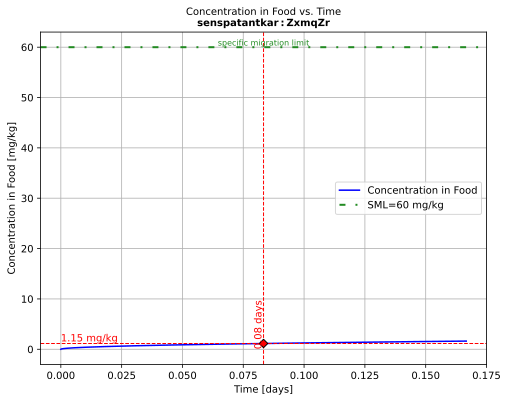

In [12]:
from patankar.useroverride import useroverride
useroverride.plotconfig["Cunit"] = "mg/kg"
result["sim"].plotCF(plotSML=True);